## Binary Classification of Machine Failures

This project is used to successful classify weather or not a machine would fail,It is broken down into the following steps 
1. Problem Defintion 
2. Data 
3. Evaluation 
4. Features 
5. Modelling


#### 1. Problem Statment

In a statement, `Given the information about a  machine, can you predict wheather or not the machine would fail?`

#### 2. Data 
The Data is gotten from Kaggle: https://www.kaggle.com/competitions/playground-series-s3e17/data

#### 3. Evaluation 
The model is successful if the its accurracy and ROC is above 80%

#### 4. Features 
The following are the features of the dataset 
- Air temperature [K]      
- Process temperature [K]  
- Rotational speed [rpm]    
- Torque [Nm]              
- Tool wear [min]          
- Machine failure         
- TWF : Tool wear failure (TWF): Tool wear failure causes a process failure.             
- HDF:Heat dissipation failure (HDF): Heat dissipation causes a process failure                  
- PWF: Power failure (PWF): Power failure causes a process failure.                     
- OSF: Overstrain failure (OSF): OSF refers to the failure caused by overstrain in the production process.              
- RNF: Random failures (RNF): RNFs are failures whose cause cannot be determined. Their occurrence probability in the production process is 0.1%  

#### 5. Modelling 
The model used to solve this problem would be Kernel Approximation model 


In [107]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import sklearn
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix 

In [50]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
df= pd.merge(train_data,test_data,how='outer')
df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0.0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0.0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0.0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0.0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227378,227378,L51130,L,302.3,311.4,1484,40.4,15,NaN,0,0,0,0,0
227379,227379,L47783,L,297.9,309.8,1542,33.8,31,NaN,0,0,0,0,0
227380,227380,L48097,L,295.6,306.2,1501,41.4,187,NaN,0,0,0,0,0
227381,227381,L48969,L,298.1,307.8,1534,40.3,69,NaN,0,0,0,0,0


In [51]:
shuffled_df = df.sample(frac=1)

In [52]:
shuffled_df.drop(['id','Product ID'],axis=1,inplace=True)
shuffled_df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
3984,M,302.2,311.2,1450,44.7,127,0.0,0,0,0,0,0
213569,L,299.6,311.0,1578,31.0,122,NaN,0,0,0,0,0
33130,L,297.6,308.5,1646,33.4,143,0.0,0,0,0,0,0
47698,M,302.7,311.0,1202,62.7,207,0.0,0,0,0,0,0
156349,L,300.3,310.4,1550,31.6,104,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65253,L,299.6,311.1,1408,46.5,154,0.0,0,0,0,0,0
38531,L,300.7,309.8,1363,35.6,183,0.0,0,0,0,0,0
103573,L,301.0,312.1,1430,39.9,2,0.0,0,0,0,0,0
6729,L,298.4,308.9,1393,44.9,116,0.0,0,0,0,0,0


In [53]:
shuffled_df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,227383.000000,227383.000000,227383.000000,227383.000000,227383.000000,136429.000000,227383.000000,227383.000000,227383.000000,227383.000000,227383.000000
mean,299.861463,309.940392,1520.409938,40.343262,104.362925,0.015744,0.001522,0.005233,0.002379,0.003923,0.002278
std,1.860371,1.385219,139.231189,8.503195,63.927361,0.124486,0.038979,0.072153,0.048720,0.062510,0.047675
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.000000,310.000000,1493.000000,40.500000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,301.200000,310.900000,1579.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
shuffled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227383 entries, 3984 to 168992
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Type                     227383 non-null  object 
 1   Air temperature [K]      227383 non-null  float64
 2   Process temperature [K]  227383 non-null  float64
 3   Rotational speed [rpm]   227383 non-null  int64  
 4   Torque [Nm]              227383 non-null  float64
 5   Tool wear [min]          227383 non-null  int64  
 6   Machine failure          136429 non-null  float64
 7   TWF                      227383 non-null  int64  
 8   HDF                      227383 non-null  int64  
 9   PWF                      227383 non-null  int64  
 10  OSF                      227383 non-null  int64  
 11  RNF                      227383 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 22.6+ MB


In [55]:
shuffled_df.isnull().sum()

Type                           0
Air temperature [K]            0
Process temperature [K]        0
Rotational speed [rpm]         0
Torque [Nm]                    0
Tool wear [min]                0
Machine failure            90954
TWF                            0
HDF                            0
PWF                            0
OSF                            0
RNF                            0
dtype: int64

In [56]:
shuffled_df.dropna(inplace=True)

In [57]:
list=[]
for i in shuffled_df.columns:
    if i !="Machine failure":
        list.append(i)
        
list

['Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [58]:
df= shuffled_df

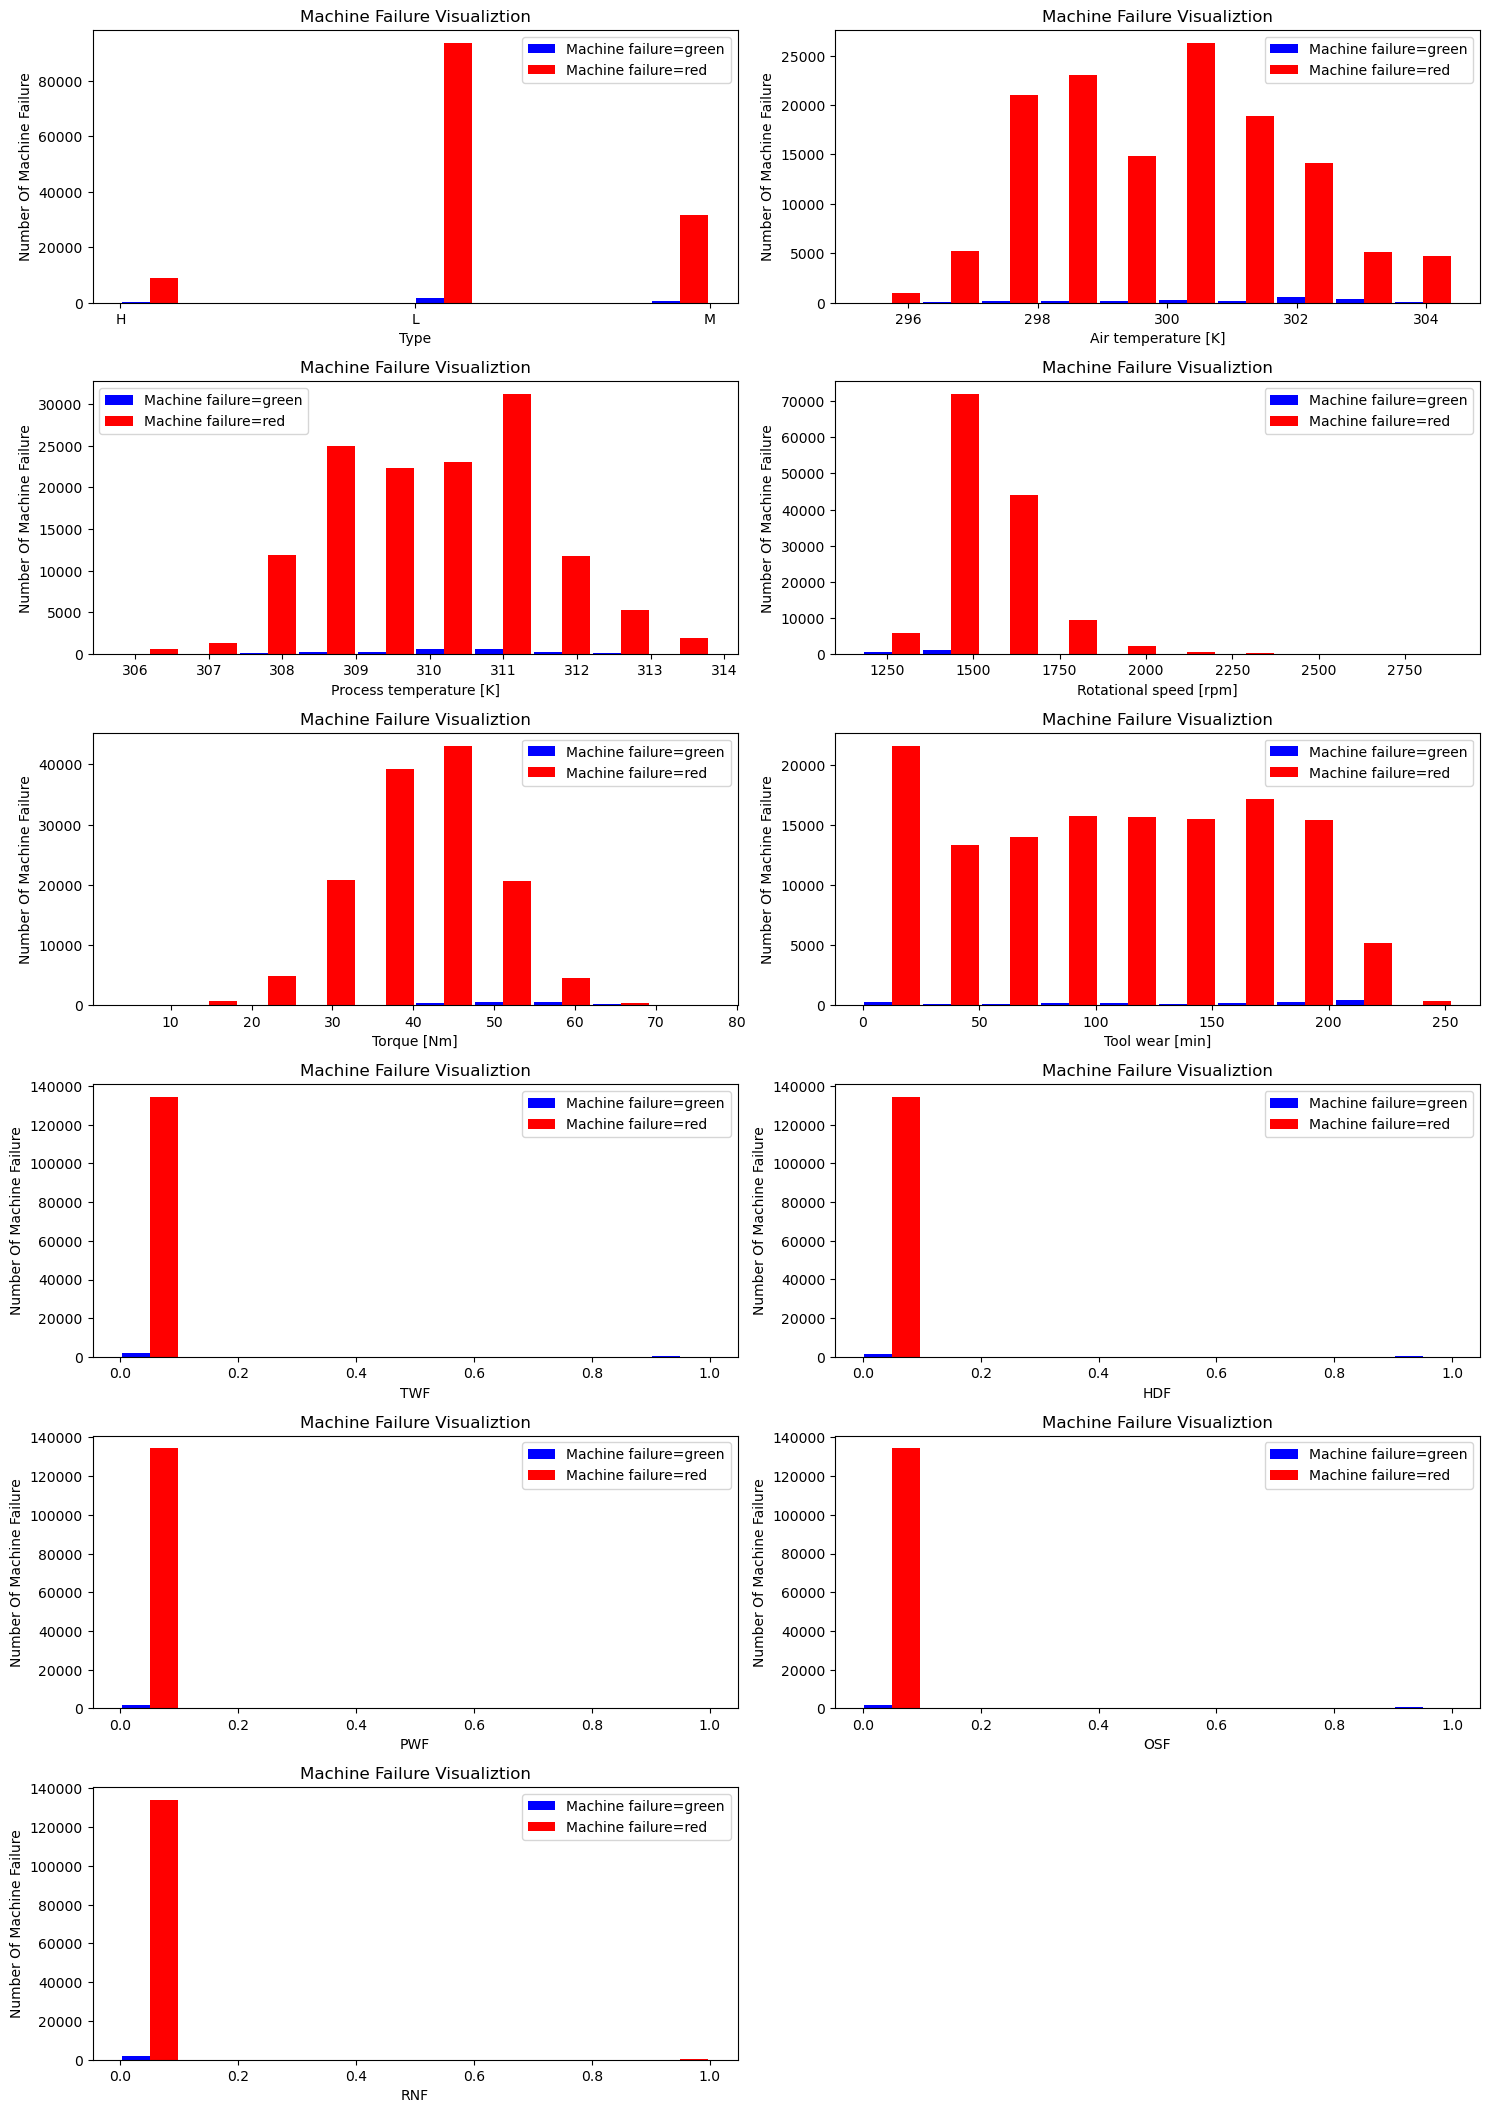

In [59]:
# The relationship between the features and the Target 
plt.figure(figsize=(15,70))
for n,column in enumerate(list):
    plot=plt.subplot(20,2,n+1)
    machine_failure_1 = df[df['Machine failure']==1][column]   
    machine_failure_0 = df[df['Machine failure']==0][column]
    plt.xlabel(column)
    plt.ylabel("Number Of Machine Failure")
    plt.title("Machine Failure Visualiztion")
    plt.hist([machine_failure_1, machine_failure_0], rwidth=0.95, color=['blue','red'], label=['Machine failure=green','Machine failure=red'])
    plt.tight_layout()
    plt.legend()
plt.show()

In [60]:

le = LabelEncoder()
le.fit(df['Type'])
df['Type']=le.transform(df['Type'])

In [61]:
def create_features(df):
    df['Failure'] = df[['TWF','HDF','PWF','OSF']].sum(axis=1)
    df['Power'] = df['Torque']*df['Rotational_Speed']
    
    df['Temperature_Difference'] = df['Process_Temperature'] - df['Air_Temperature']
    df['Temperature_Ratio'] =      df['Process_Temperature'] / df['Air_Temperature']
        
    df['Speed_to_Temp'] = df['Rotational_Speed'] * df['Process_Temperature']
    
    df['Torque_to_Pro'] =    df['Torque'] * df['Process_Temperature']
    df['Torque_to_Air'] =    df['Torque'] * df['Air_Temperature']
    df["Torque_Wear"] =      df['Torque'] *  df['Tool_Wear'] 
    
    df['Power_to_Pro'] = df['Power'] * df['Process_Temperature']
    df['Power_to_Air'] = df['Power'] * df['Air_Temperature']
    
    df['Tool_Air'] = df['Tool_Wear'] / df['Air_Temperature']
    df['Tool_Pro'] = df['Tool_Wear'] / df['Process_Temperature']
   
    df["TWF_Reel"]=df['Tool_Air']*df['TWF']
    df["HDF_Reel"]=df['Temperature_Ratio']*df['HDF']
    df["PWF_Reel"]=df['Power']*df['PWF']
    df["OSF_Reel"]=df['Speed_to_Temp']*df['OSF']
    
    df["Temp_to_Wear"]=df['Temperature_Ratio']* df['Tool_Wear']
    df["Torq_to_Wear"]=df['Temperature_Ratio']* df['Torque']
    df["Temp_to_Speed"]=df['Temperature_Ratio']/ df['Rotational_Speed']
    
    
    return df

In [62]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
3984,2,302.2,311.2,1450,44.7,127,0.0,0,0,0,0,0
33130,1,297.6,308.5,1646,33.4,143,0.0,0,0,0,0,0
47698,2,302.7,311.0,1202,62.7,207,0.0,0,0,0,0,0
119697,1,298.6,310.2,1598,30.3,42,0.0,0,0,0,0,0
27153,1,302.3,311.3,1324,46.6,131,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
84790,0,296.0,306.6,1583,38.2,121,0.0,0,0,0,0,0
65253,1,299.6,311.1,1408,46.5,154,0.0,0,0,0,0,0
38531,1,300.7,309.8,1363,35.6,183,0.0,0,0,0,0,0
103573,1,301.0,312.1,1430,39.9,2,0.0,0,0,0,0,0


In [63]:
x= df.drop(['Machine failure'],axis=1)
y= df['Machine failure']

In [87]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)
rbf_feature = RBFSampler(gamma=1, random_state=42)
X_features = rbf_feature.fit_transform(x_train)
model = SGDClassifier(loss="hinge", penalty="l2", max_iter=10)
model.fit(X_features, y_train)

SGDClassifier(max_iter=10)

In [90]:
y_predict=model.predict(rbf_feature.fit_transform(x_test))
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [91]:
metrics.accuracy_score(y_test,y_predict)

0.9841677050502089

In [97]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_predict, pos_label = 1)
auc(fpr, tpr)

0.5

In [99]:
crossval_score= cross_val_score(model, x, y, cv=5, scoring="roc_auc")

c:\Users\charlie\Documents\ml_project\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\charlie\Documents\ml_project\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\charlie\Documents\ml_project\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\charlie\Documents\ml_project\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

In [101]:
print(crossval_score.mean())

0.8005535137472484


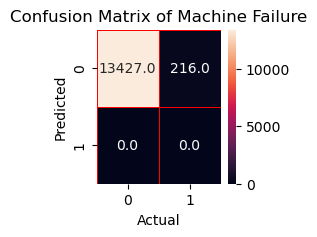

In [106]:
conf_metrix=confusion_matrix(y_predict,y_test)
f,ax=plt.subplots(figsize=(2,2))
sns.heatmap(conf_metrix,annot=True,linewidths=0.5,linecolor="red",fmt=".1f",ax=ax)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix of Machine Failure")
plt.show();

array([[13427,     0],
       [  216,     0]], dtype=int64)